<a href="https://colab.research.google.com/github/housemLassoued/ML-deployment/blob/main/Dog_Breed_Classification_Using_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"housemlassoued","key":"d706f47444fe22b8a6c8bbacb53640a4"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d gpiosenka/70-dog-breedsimage-data-set

Dataset URL: https://www.kaggle.com/datasets/gpiosenka/70-dog-breedsimage-data-set
License(s): CC0-1.0
 99% 212M/215M [00:08<00:00, 29.8MB/s]
100% 215M/215M [00:08<00:00, 25.4MB/s]


In [ ]:
! unzip 70-dog-breedsimage-data-set.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: train/Dhole/085.jpg     
  inflating: train/Dhole/086.jpg     
  inflating: train/Dhole/087.jpg     
  inflating: train/Dhole/088.jpg     
  inflating: train/Dhole/089.jpg     
  inflating: train/Dhole/090.jpg     
  inflating: train/Dhole/091.jpg     
  inflating: train/Dhole/092.jpg     
  inflating: train/Dhole/093.jpg     
  inflating: train/Dhole/094.jpg     
  inflating: train/Dhole/095.jpg     
  inflating: train/Dhole/096.jpg     
  inflating: train/Dhole/097.jpg     
  inflating: train/Dhole/098.jpg     
  inflating: train/Dhole/099.jpg     
  inflating: train/Dhole/100.jpg     
  inflating: train/Dhole/101.jpg     
  inflating: train/Dhole/102.jpg     
  inflating: train/Dhole/103.jpg     
  inflating: train/Dhole/104.jpg     
  inflating: train/Dhole/105.jpg     
  inflating: train/Dhole/106.jpg     
  inflating: train/Dhole/107.jpg     
  inflating: train/Dhole/108.jpg     
  inflatin

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
labels=pd.read_csv('/content/dogs.csv')
labels.head()

,filepaths,labels,data set
0,train/Afghan/001.jpg,Afghan,train
1,train/Afghan/002.jpg,Afghan,train
2,train/Afghan/003.jpg,Afghan,train
3,train/Afghan/004.jpg,Afghan,train
4,train/Afghan/005.jpg,Afghan,train


In [ ]:
train_Afghan_path='/content/train/Afghan'
test_Afghan_path='/content/test/Afghan'

In [ ]:
from pathlib import Path
import glob
train_Afghan_files=glob.glob(train_Afghan_path+'/*')
test_Afghan_files=glob.glob(test_Afghan_path+'/*')

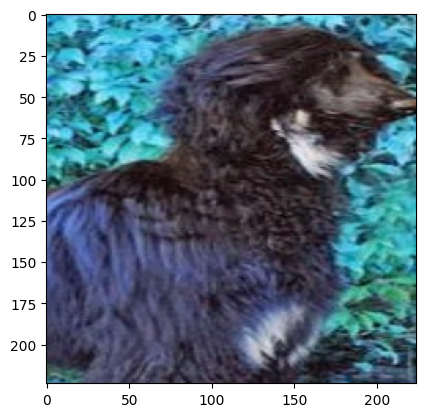

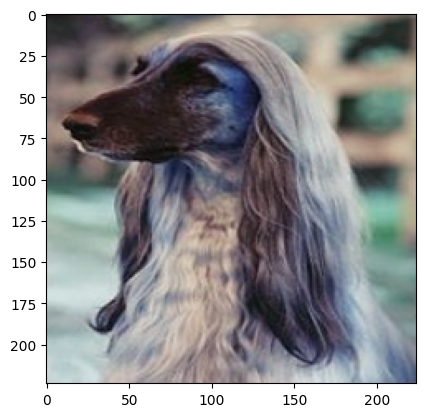

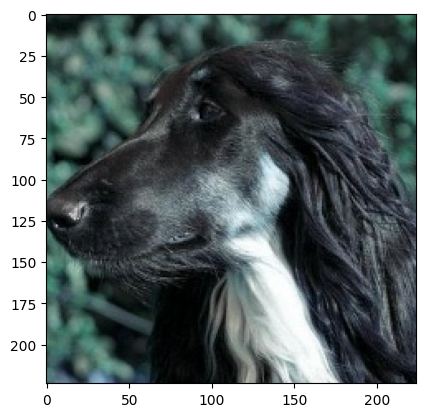

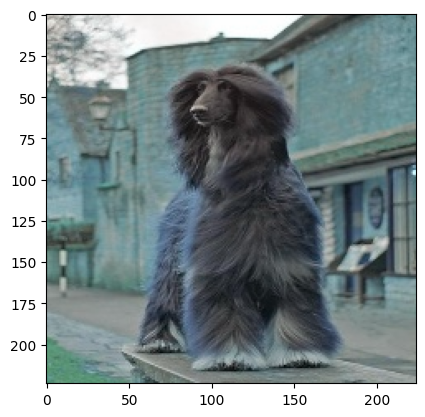

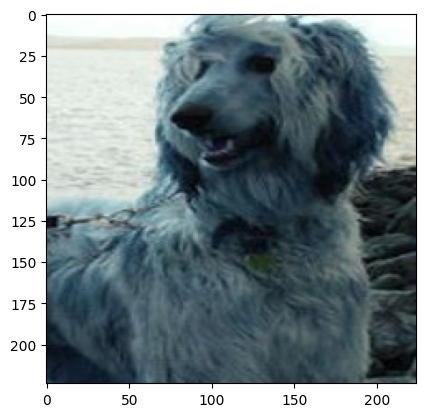

In [ ]:
import cv2
for i in range(5):
  image=cv2.imread(train_Afghan_files[i])
  if image is not None: #Check if image is loaded correctly
    #image = cv2.resize(image, (224,224)) # Resize image using cv2.resize
    plt.imshow(image)
    plt.show()
  else:
    print(f"Failed to load image: {train_Afghan_files[i]}")

In [ ]:
image= cv2.imread(train_Afghan_files[0])
image.shape

(224, 224, 3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)
valide_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator=train_datagen.flow_from_directory(
    directory='/content/train',
    target_size=(224, 224),
    batch_size=32,
    subset='training',
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True,
    seed=42
)

Found 7946 images belonging to 70 classes.


In [ ]:
valide_generator=valide_datagen.flow_from_directory(
    directory='/content/valid',

    batch_size=32,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True,
    seed=42
)

Found 700 images belonging to 70 classes.


In [ ]:
test_generator=test_datagen.flow_from_directory(
    directory='/content/test',
    target_size=(224, 224),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False,
    seed=42
)

Found 700 images belonging to 70 classes.


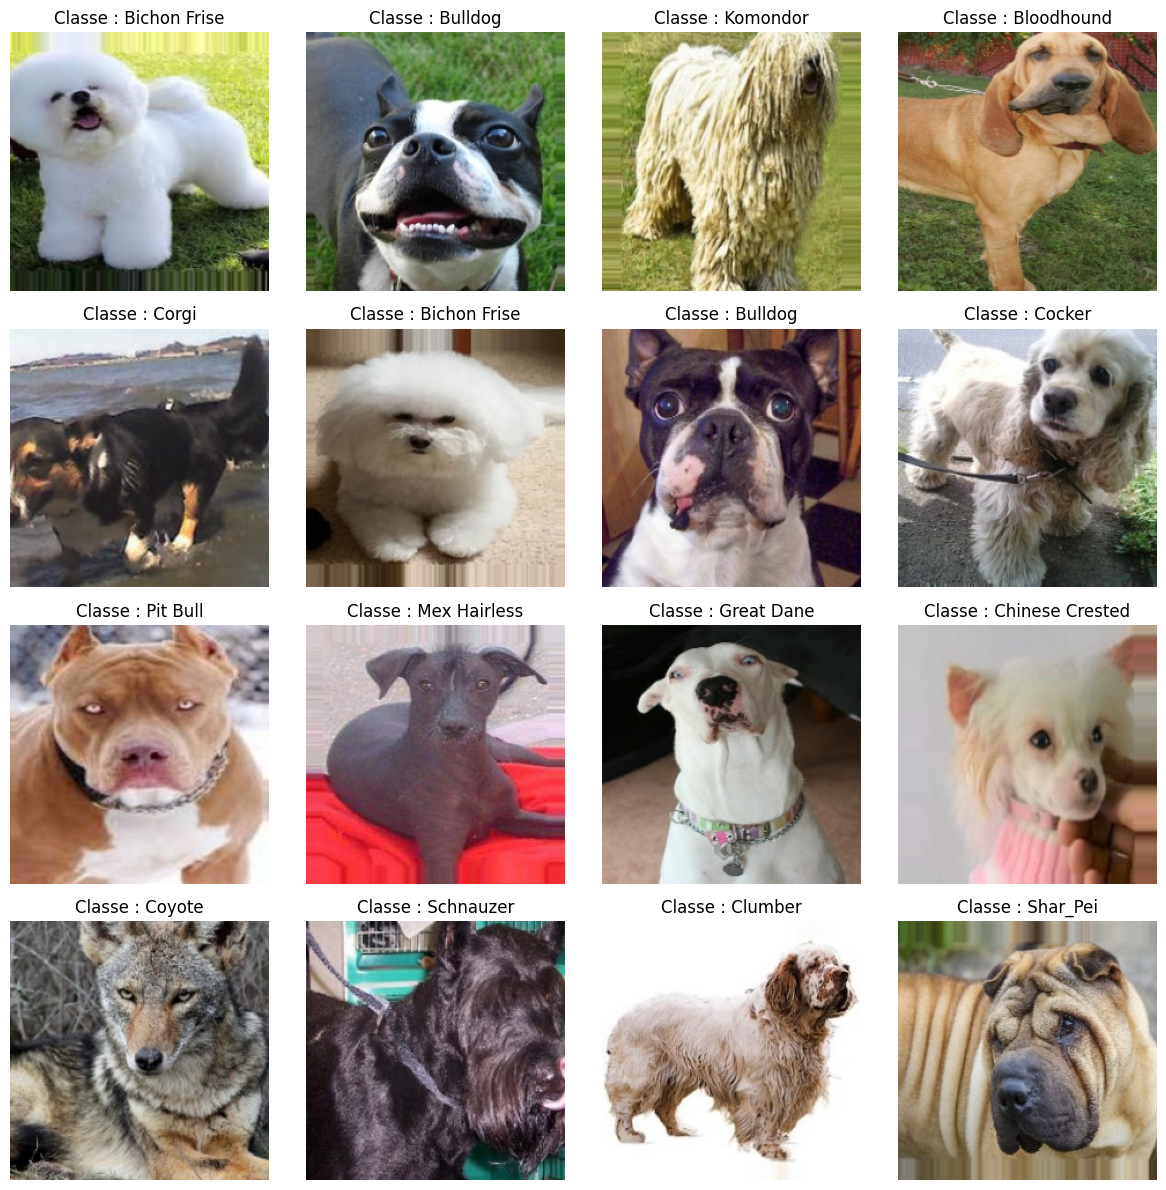

In [ ]:
dic = train_generator.class_indices
class_names = list(dic.keys())
images, labels = next(train_generator)
plt.figure(figsize=(12, 12))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
    plt.title(f"Classe : {class_names[np.argmax(labels[i])]}")
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet101V2

base_model = ResNet101V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Use the Functional API to correctly connect the layers
inputs = layers.Input(shape=(224, 224, 3))
x = base_model(inputs)

x = layers.GlobalAveragePooling2D()(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(70, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=outputs)
model.summary()

171317808/171317808 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "functional_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet101v2 (Functional)             │ (None, 7, 7, 2048)          │      42,626,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 70)                  │           9,030 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 43,857,094 (167.30 MB)

 Trainable params: 43,755,334 (166.91 MB)

 Non-trainable params: 101,760 (397.50 KB)

In [ ]:
base_model.trainable = False

In [ ]:
import tensorflow
early = tensorflow.keras.callbacks.EarlyStopping( patience=10,
                                          min_delta=0.001,
                                          restore_best_weights=True)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(train_generator,
                    validation_data=valide_generator,
                    epochs=25,
                    batch_size=32,
                    callbacks=[early])

Epoch 1/25
249/249 ━━━━━━━━━━━━━━━━━━━━ 145s 486ms/step - accuracy: 0.4653 - loss: 2.2411 - val_accuracy: 0.8957 - val_loss: 0.4883
Epoch 2/25
249/249 ━━━━━━━━━━━━━━━━━━━━ 103s 403ms/step - accuracy: 0.8212 - loss: 0.6047 - val_accuracy: 0.9314 - val_loss: 0.4884
Epoch 3/25
249/249 ━━━━━━━━━━━━━━━━━━━━ 141s 398ms/step - accuracy: 0.8494 - loss: 0.5086 - val_accuracy: 0.9286 - val_loss: 0.5343
Epoch 4/25
249/249 ━━━━━━━━━━━━━━━━━━━━ 103s 399ms/step - accuracy: 0.8687 - loss: 0.4320 - val_accuracy: 0.9186 - val_loss: 0.5770
Epoch 5/25
249/249 ━━━━━━━━━━━━━━━━━━━━ 143s 404ms/step - accuracy: 0.8778 - loss: 0.4244 - val_accuracy: 0.9371 - val_loss: 0.5158
Epoch 6/25
249/249 ━━━━━━━━━━━━━━━━━━━━ 104s 407ms/step - accuracy: 0.8990 - loss: 0.3231 - val_accuracy: 0.9429 - val_loss: 0.4220
Epoch 7/25
249/249 ━━━━━━━━━━━━━━━━━━━━ 102s 400ms/step - accuracy: 0.9079 - loss: 0.2895 - val_accuracy: 0.9243 - val_loss: 0.5286
Epoch 8/25
249/249 ━━━━━━━━━━━━━━━━━━━━ 103s 405ms/step - accuracy: 0.9167 -

In [ ]:
accuracy_score = model.evaluate(test_generator)
print(accuracy_score)

22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.9315 - loss: 0.2007
[0.1638040989637375, 0.9428571462631226]
